In [1]:
import pandas as pd

try:
    df = pd.read_csv('cybersecurity_attacks.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'cybersecurity_attacks.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


(2348, 25)


Data Shape: (2348, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               2348 non-null   object 
 1   Source IP Address       2348 non-null   object 
 2   Destination IP Address  2348 non-null   object 
 3   Source Port             2348 non-null   int64  
 4   Destination Port        2348 non-null   int64  
 5   Protocol                2348 non-null   object 
 6   Packet Length           2348 non-null   int64  
 7   Packet Type             2348 non-null   object 
 8   Traffic Type            2348 non-null   object 
 9   Payload Data            2348 non-null   object 
 10  Malware Indicators      2348 non-null   object 
 11  Anomaly Scores          2348 non-null   float64
 12  Alerts/Warnings         2348 non-null   object 
 13  Attack Type             2348 non-null   object 
 14  Attack Signature 

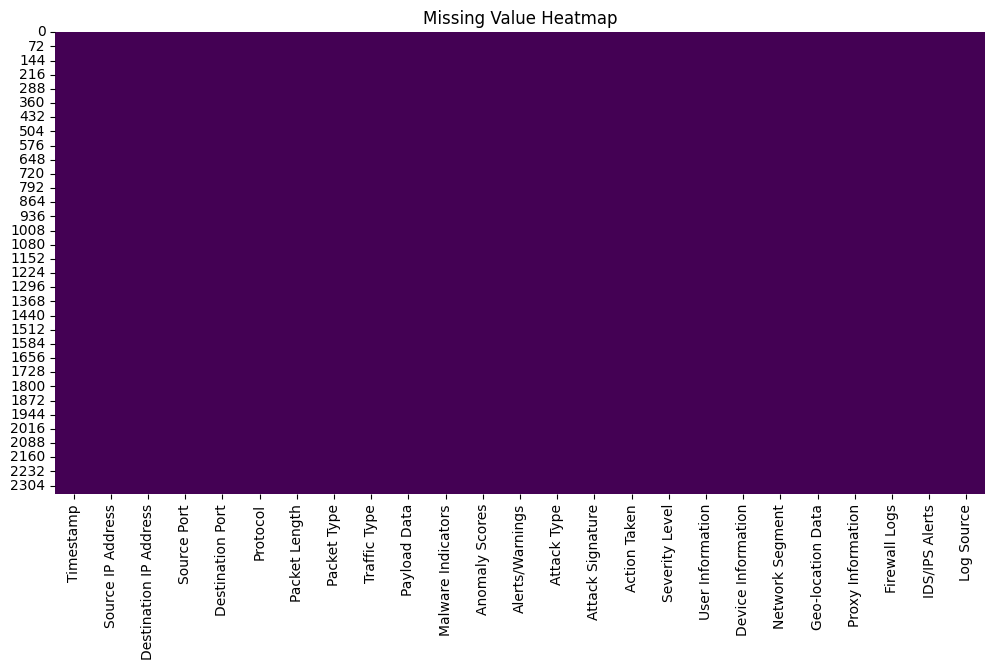


Missing target columns: ['Threat Severity']

Descriptive Statistics for Numerical Features:
         Source Port  Destination Port  Packet Length  Anomaly Scores
count   2348.000000       2348.000000    2348.000000     2348.000000
mean   32314.992760      32838.227428     788.548552       50.104647
std    18781.241745      18571.544069     413.974742       28.932539
min     1031.000000       1030.000000      64.000000        0.060000
25%    15965.500000      17096.250000     428.750000       24.657500
50%    31733.000000      32502.000000     786.000000       50.520000
75%    48357.000000      49076.500000    1143.250000       75.160000
max    65521.000000      65535.000000    1500.000000       99.990000

Unique values and counts for Attack Type:
Attack Type
ddos         800
malware      779
intrusion    769
Name: count, dtype: int64


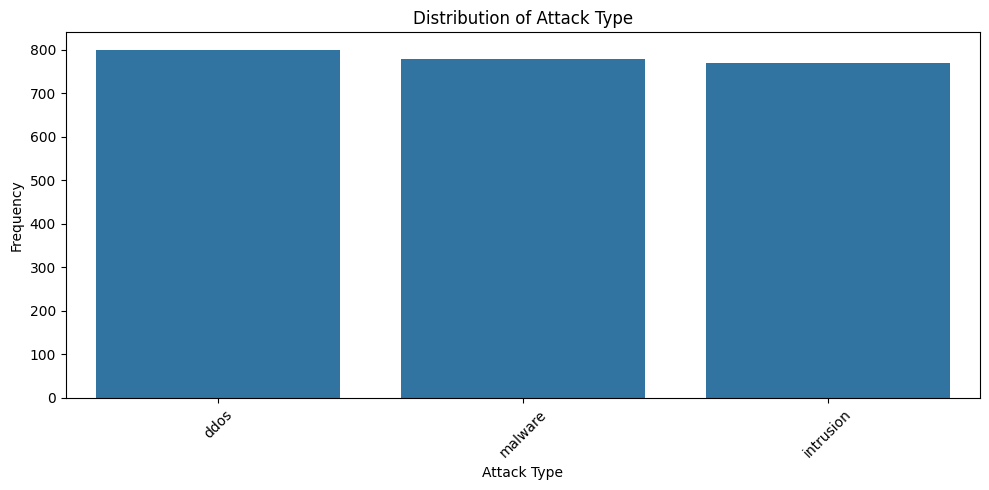


Column 'Threat Severity' is missing from the dataset.

Unique values and counts for Traffic Type:
Traffic Type
HTTP    805
DNS     790
FTP     753
Name: count, dtype: int64


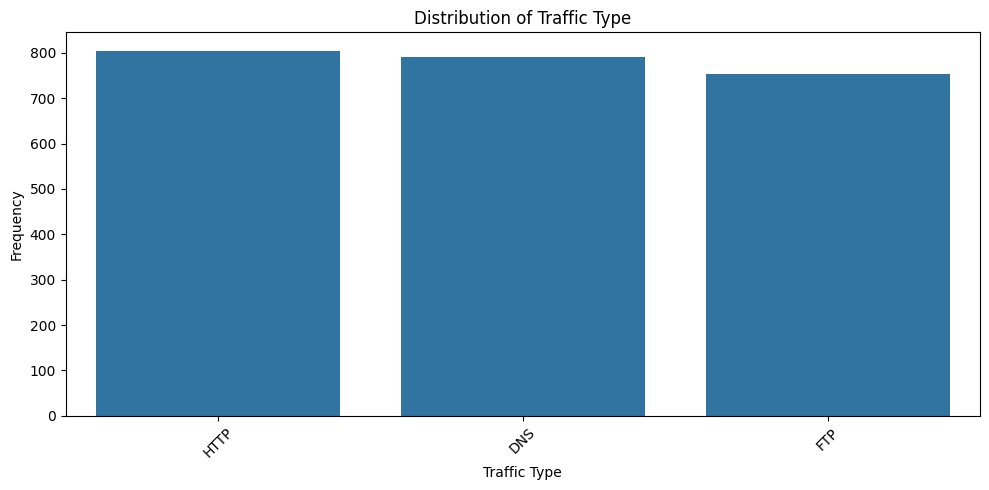

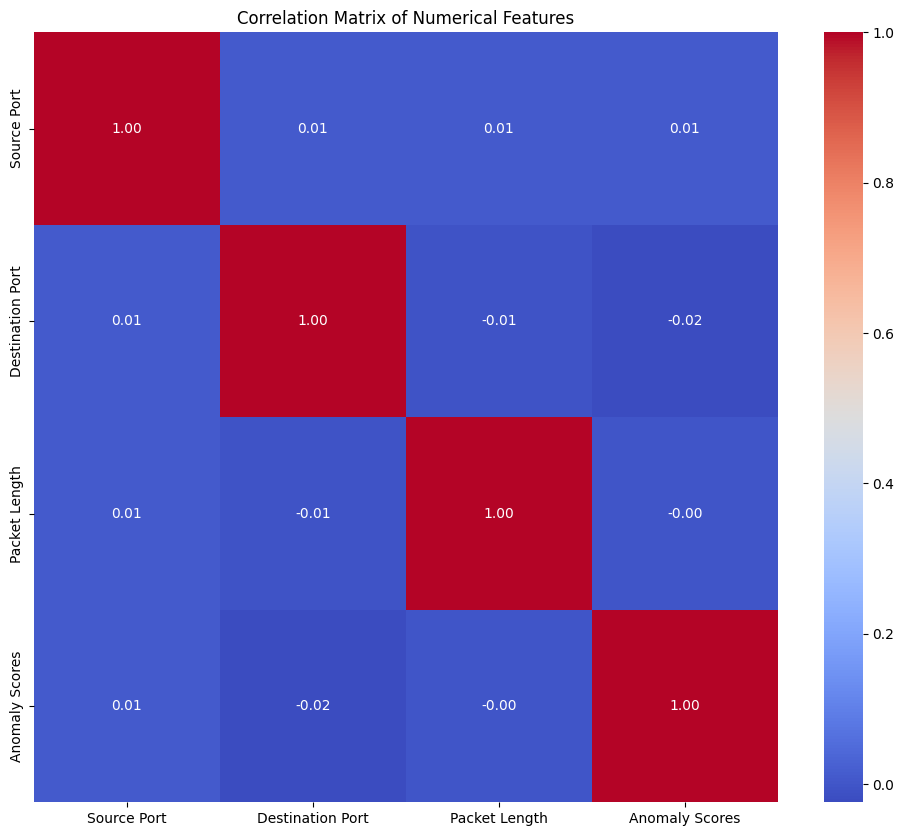

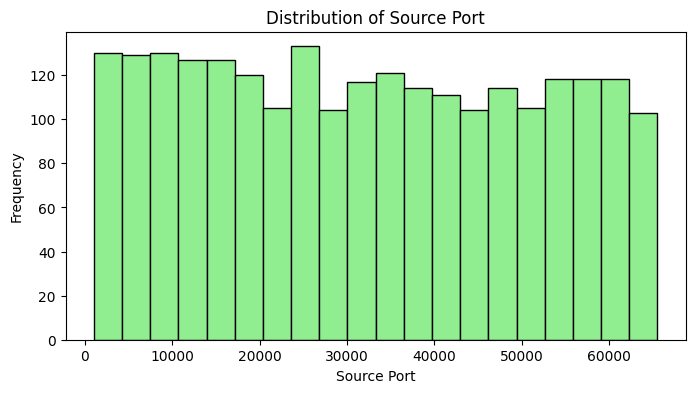

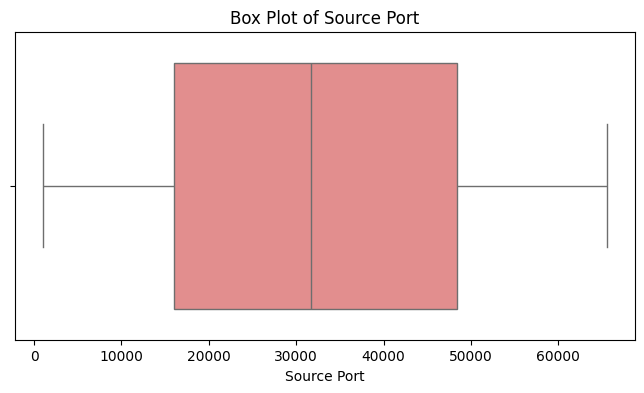

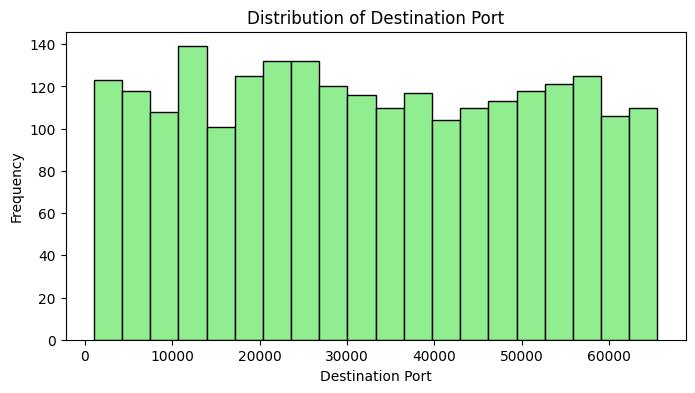

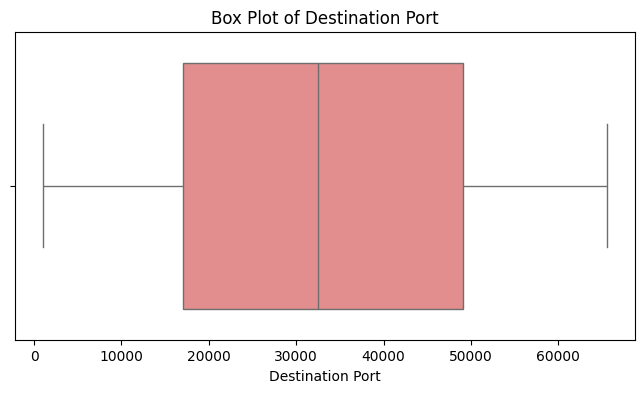

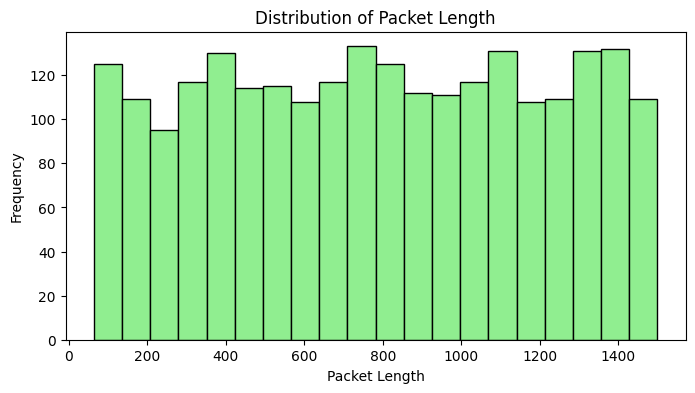

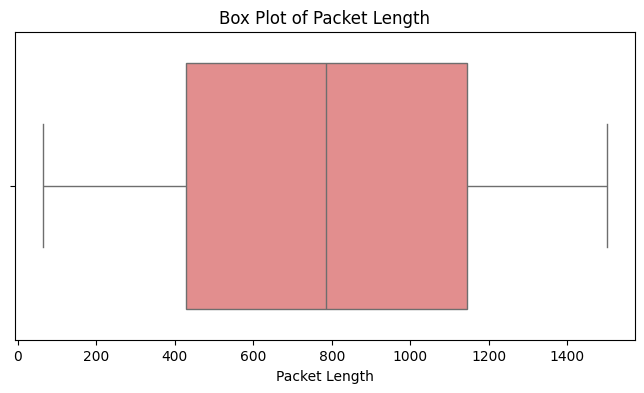

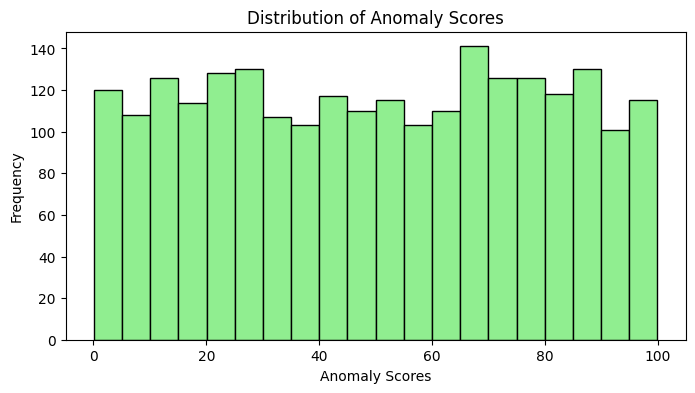

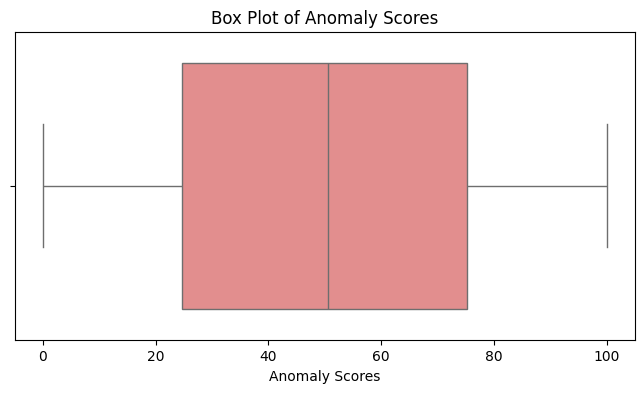

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update with your actual dataset path)
# df = pd.read_csv("your_dataset.csv")  # Uncomment this line and replace with the correct file path

# 1. Data Shape and Info
print("Data Shape:", df.shape)
df.info()

# 2. Missing Values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nMissing Value Percentage:\n", missing_percentage)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

# 3. Check for Target Variables and their Data Types
target_columns = ['Attack Type', 'Threat Severity', 'Traffic Type']
missing_cols = [col for col in target_columns if col not in df.columns]
if missing_cols:
    print(f"\nMissing target columns: {missing_cols}")
else:
    print("\nData Types of Target Variables:")
    print(df[target_columns].dtypes)

# 4. Descriptive Statistics for Numerical Features
print("\nDescriptive Statistics for Numerical Features:\n", df.describe())

# 5. Target Variable Exploration (Check for missing columns before plotting)
for col in target_columns:
    if col in df.columns:
        print(f"\nUnique values and counts for {col}:\n{df[col].value_counts()}")
        plt.figure(figsize=(10, 5))
        sns.countplot(x=df[col], order=df[col].value_counts().index)  # Removed palette to avoid warning
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nColumn '{col}' is missing from the dataset.")

# 6. Correlation Analysis for Numerical Features
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 7. Data Visualization (Histograms, Box Plots for numerical features)
for col in numerical_cols:
    # Histogram
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Box Plot of {col}')
    plt.show()

In [2]:
import pandas as pd
import numpy as np

# 1. Missing Value Imputation
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Impute missing values in numerical columns with median
for col in numerical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())  # Corrected: Direct assignment instead of inplace

# Impute missing values in categorical columns with mode
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])  # Corrected: Direct assignment instead of inplace

# 2. Outlier Handling
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)  # Corrected: Direct assignment instead of inplace

# 3. Data Consistency (Example: Standardizing 'Attack Type')
df['Attack Type'] = df['Attack Type'].str.lower()  # No chained assignment here, safe to use

# 4. Duplicate Removal
df = df.drop_duplicates()  # Corrected: Direct assignment instead of inplace

# 5. Verify Changes
print("\nMissing values after imputation:\n", df.isnull().sum())
print("\nDescriptive statistics after outlier handling:\n", df.describe())



Missing values after imputation:
 Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

Descriptive statistics after outlier handling:
         Source Port  Destination Port  Packet Length  Anomaly Scores
count   2348.000000       2348.000000    2348.000000     2348.000000
mean   32314.992760      32838.227428     788.548552       50.104

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df_cleaned = pd.read_csv("cybersecurity_attacks.csv")  

# Identify categorical and numerical features
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variables from features
target_variables = ['Attack Type', 'Severity Level', 'Traffic Type']
for var in target_variables:
    if var in categorical_features:
        categorical_features.remove(var)
    elif var in numerical_features:
        numerical_features.remove(var)

# Create transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

# Fit and transform the data
X = preprocessor.fit_transform(df_cleaned)

# Separate target variables
y_attack = df_cleaned['Attack Type']
y_severity = df_cleaned['Severity Level']
y_traffic = df_cleaned['Traffic Type']

# Create a DataFrame to display as a table
df_output = pd.DataFrame({
    "Attack Type": y_attack,
    "Severity Level": y_severity,
    "Traffic Type": y_traffic
})

# Print the table
print("="*50)
print("                 TARGET VARIABLES TABLE")
print("="*50)
print(df_output.to_string(index=False))
print("="*50)


                 TARGET VARIABLES TABLE
Attack Type Severity Level Traffic Type
    Malware            Low         HTTP
    Malware            Low         HTTP
       DDoS            Low         HTTP
    Malware         Medium         HTTP
       DDoS            Low          DNS
    Malware         Medium         HTTP
       DDoS           High          DNS
  Intrusion           High          DNS
  Intrusion           High          FTP
    Malware         Medium         HTTP
    Malware         Medium         HTTP
    Malware            Low         HTTP
  Intrusion         Medium          DNS
    Malware            Low         HTTP
    Malware           High          DNS
  Intrusion         Medium          DNS
       DDoS           High         HTTP
       DDoS            Low         HTTP
       DDoS           High          DNS
       DDoS           High         HTTP
    Malware         Medium          DNS
    Malware            Low          DNS
       DDoS           High          DNS


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df_cleaned = pd.read_csv("cybersecurity_attacks.csv")  

# Identify categorical and numerical features
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variables from features
target_variables = ['Attack Type', 'Severity Level', 'Traffic Type']
for var in target_variables:
    if var in categorical_features:
        categorical_features.remove(var)
    elif var in numerical_features:
        numerical_features.remove(var)

# Create transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

# Separate features and target variable
X = df_cleaned.drop(columns=target_variables)  # Features (excluding targets)
y = df_cleaned['Attack Type']  # Target variable for attack type classification

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing transformation to train and test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Create a RandomForestClassifier
attack_model = RandomForestClassifier(random_state=42)

# Train the model
attack_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = attack_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Attack Type Prediction Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Attack Type Prediction Accuracy: 0.32978723404255317
              precision    recall  f1-score   support

        DDoS       0.32      0.56      0.41       154
   Intrusion       0.33      0.11      0.17       163
     Malware       0.34      0.33      0.33       153

    accuracy                           0.33       470
   macro avg       0.33      0.33      0.30       470
weighted avg       0.33      0.33      0.30       470



In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df_cleaned = pd.read_csv("cybersecurity_attacks.csv")  

# Identify categorical and numerical features
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define target variables
target_variables = ['Attack Type', 'Severity Level', 'Traffic Type']
for var in target_variables:
    if var in categorical_features:
        categorical_features.remove(var)
    elif var in numerical_features:
        numerical_features.remove(var)

# Create transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

# Separate features and target variable (Severity Level)
X = df_cleaned.drop(columns=target_variables)  # Features (excluding targets)
y_severity = df_cleaned['Severity Level']  # Target variable for severity classification

# Split dataset into training and testing sets (80% train, 20% test)
X_train_severity, X_test_severity, y_train_severity, y_test_severity = train_test_split(
    X, y_severity, test_size=0.2, random_state=42
)

# Apply preprocessing transformation to train and test sets
X_train_severity = preprocessor.fit_transform(X_train_severity)
X_test_severity = preprocessor.transform(X_test_severity)

# Create a RandomForestClassifier for Severity Level classification
severity_model = RandomForestClassifier(random_state=42)

# Train the model
severity_model.fit(X_train_severity, y_train_severity)

# Make predictions on the test set
y_pred_severity = severity_model.predict(X_test_severity)

# Evaluate the model
accuracy = accuracy_score(y_test_severity, y_pred_severity)
print(f"Threat Severity Classification Accuracy: {accuracy}")
print(classification_report(y_test_severity, y_pred_severity))


Threat Severity Classification Accuracy: 0.35319148936170214
              precision    recall  f1-score   support

        High       0.32      0.36      0.34       143
         Low       0.39      0.52      0.45       164
      Medium       0.32      0.18      0.23       163

    accuracy                           0.35       470
   macro avg       0.34      0.35      0.34       470
weighted avg       0.34      0.35      0.34       470



In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df_cleaned = pd.read_csv("cybersecurity_attacks.csv")  

# Identify categorical and numerical features
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define target variables
target_variables = ['Attack Type', 'Severity Level', 'Traffic Type']
for var in target_variables:
    if var in categorical_features:
        categorical_features.remove(var)
    elif var in numerical_features:
        numerical_features.remove(var)

# Create transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

# Separate features and target variable (Traffic Type)
X = df_cleaned.drop(columns=target_variables)  # Features (excluding targets)
y_traffic = df_cleaned['Traffic Type']  # Target variable for traffic classification

# Split dataset into training and testing sets (80% train, 20% test)
X_train_traffic, X_test_traffic, y_train_traffic, y_test_traffic = train_test_split(
    X, y_traffic, test_size=0.2, random_state=42
)

# Apply preprocessing transformation to train and test sets
X_train_traffic = preprocessor.fit_transform(X_train_traffic)
X_test_traffic = preprocessor.transform(X_test_traffic)

# Create a RandomForestClassifier for Traffic Type classification
traffic_model = RandomForestClassifier(random_state=42)

# Train the model
traffic_model.fit(X_train_traffic, y_train_traffic)

# Make predictions on the test set
y_pred_traffic = traffic_model.predict(X_test_traffic)

# Evaluate the model
accuracy = accuracy_score(y_test_traffic, y_pred_traffic)
print(f"Traffic Type Prediction Accuracy: {accuracy}")
print(classification_report(y_test_traffic, y_pred_traffic))


Traffic Type Prediction Accuracy: 0.3148936170212766
              precision    recall  f1-score   support

         DNS       0.37      0.27      0.31       170
         FTP       0.21      0.12      0.15       147
        HTTP       0.32      0.56      0.41       153

    accuracy                           0.31       470
   macro avg       0.30      0.31      0.29       470
weighted avg       0.30      0.31      0.29       470

